# Video Games

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from modeling import dt_comp, knn_comp, rf_comp, model_comp
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

## Wrangle

In [2]:
# Bring in cached dataframe for easy working
df = pd.read_csv('Video_Games.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

### Immediate thoughts: 
- 1. Need to change columns to snake_code
- 2. I have a lot of nulls already present, I need to see just how many I'm working with
- 3. Some objects have weird data types (year is a float?) Need to change that

In [4]:
# 1. 
df.columns = df.columns.str.lower()

In [5]:
# just how many nulls do we have here?
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

In [6]:
# that's way too many null values to fill reasonably on some of the columns
# so I'm just going to drop them since I'm mainly interested in the sales anyways
df = df.drop(columns={'critic_score', 'critic_count', 'user_score', 'user_count','developer', 'rating'})

In [7]:
# I've still got a handful of nulls so let's see if theres a reasonable way to fill those
null_val = df[df['year_of_release'].isnull()]
null_val
# there's some very easy looking fixes I see but I should try and find a way to fill all the easily named ones.

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


In [8]:
# code idea: I need to write a for loop to go through all the columns where 'year_of_release' is null, and if the name of the entry ends with a year
# (like 'Madden NFL 2004'), it needs to grab the last four characters and fill in the 'year_of_release' column
for i in null_val.index:
    if null_val.name[i][-4:].isnumeric():
        # when games state the year in the title, it's released the year prior, that's why we're subtracting 1 from the year here
        df['year_of_release'][i] = int(null_val.name[i][-4:]) - 1

In [9]:
# now that we've taken the quick fixes out, let's drop the rest to get to MVP
df = df.dropna()
df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [10]:
# awesome, now let's change our year of release column into an integer
df['year_of_release'] = df['year_of_release'].astype(int)
df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [11]:
# we no longer need our names since we're trying to predict off categories like publisher, genre, platform
df = df.drop(columns = 'name')
df

,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16714,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


### We have a lot of platforms (consoles) here. Looking at the entries seperated by year, there's a large increase in the amount of games after 1994 and a drop off after 2016. so we'll drop everything prior to 1994 and after 2016

In [12]:
# im only interested in games between 1994, and 2017
df = df[(df.year_of_release >1993) & (df.year_of_release < 2017)]
df

,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...
16714,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


### Even still, we have some games that appear to only have sales in one country primarily, I'm interested in the global scale
### We're going to remove entries where they only show sales in one country

In [13]:
# code ideas: a if global_sales - one column(na_sales, eu_sales,jp_sales, other_sales) = 0, omit
df = df[(df.global_sales - df.na_sales != 0) & (df.global_sales - df.eu_sales != 0) & (df.global_sales - df.jp_sales != 0) & (df.global_sales - df.other_sales != 0)]
# I want to look at games that have made more than 90,000 sales globally
df = df[df.global_sales > 0.09]
df

,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...
10822,XOne,2016,Platform,Activision,0.05,0.04,0.00,0.01,0.10
10823,XB,2002,Action,Activision,0.07,0.02,0.00,0.00,0.10
10824,PSP,2006,Racing,Electronic Arts,0.09,0.00,0.00,0.01,0.10
10825,WiiU,2014,Action,Activision,0.08,0.00,0.00,0.01,0.10


In [14]:
# mapping platforms into one of three for easier comparisons
df['platform'] = df['platform'].map({'PS2': 'c', 'DS': 'h', 'PS':'c', 'X360':'c', 'PS3':'c', 'Wii':'c',
                    'XB':'c', 'GBA':'h', 'PC':'c', 'PSP':'h', 'GC':'c', 'PS4':'c',
                    'N64':'r', '3DS':'h', 'XOne':'c', 'PSV':'h', 'WiiU':'h', 'GB':'h',
                    'SNES':'r', 'DC':'r', 'GEN':'r', 'SAT':'r', 'SCD':'r' })
# now that everything is mapped to one of three, let's name them a little clearer
df['platform'] = df['platform'].map({'c':'home_console', 'h':'handheld', 'r':'retro'})
df

,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,home_console,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,home_console,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,home_console,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,handheld,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,handheld,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...
10822,home_console,2016,Platform,Activision,0.05,0.04,0.00,0.01,0.10
10823,home_console,2002,Action,Activision,0.07,0.02,0.00,0.00,0.10
10824,handheld,2006,Racing,Electronic Arts,0.09,0.00,0.00,0.01,0.10
10825,handheld,2014,Action,Activision,0.08,0.00,0.00,0.01,0.10


## Exploration

### Immediate Thoughts:
- Can we predict global sales based on genre?
- Do certain genres have higher sales in different countries? (ex: Do shooters do better in the US vs. europe)

In [15]:
# as much as I want to use it, we have too many publishers to predict from
df = df.drop(columns = ['publisher', 'other_sales'])

In [16]:
# we need to change these categorical values into numerical so I can see possible correlations
df.genre = df.genre.map({'Action':0, 'Sports':1, 'Misc':2, 'Role-Playing':3, 'Shooter':4,
                         'Adventure':5, 'Racing':6, 'Platform':7, 'Simulation':8,
                         'Fighting':9, 'Strategy':10, 'Puzzle':11}).astype(int)
df.platform= df.platform.map({'retro':0, 'home_console':1, 'handheld':2})

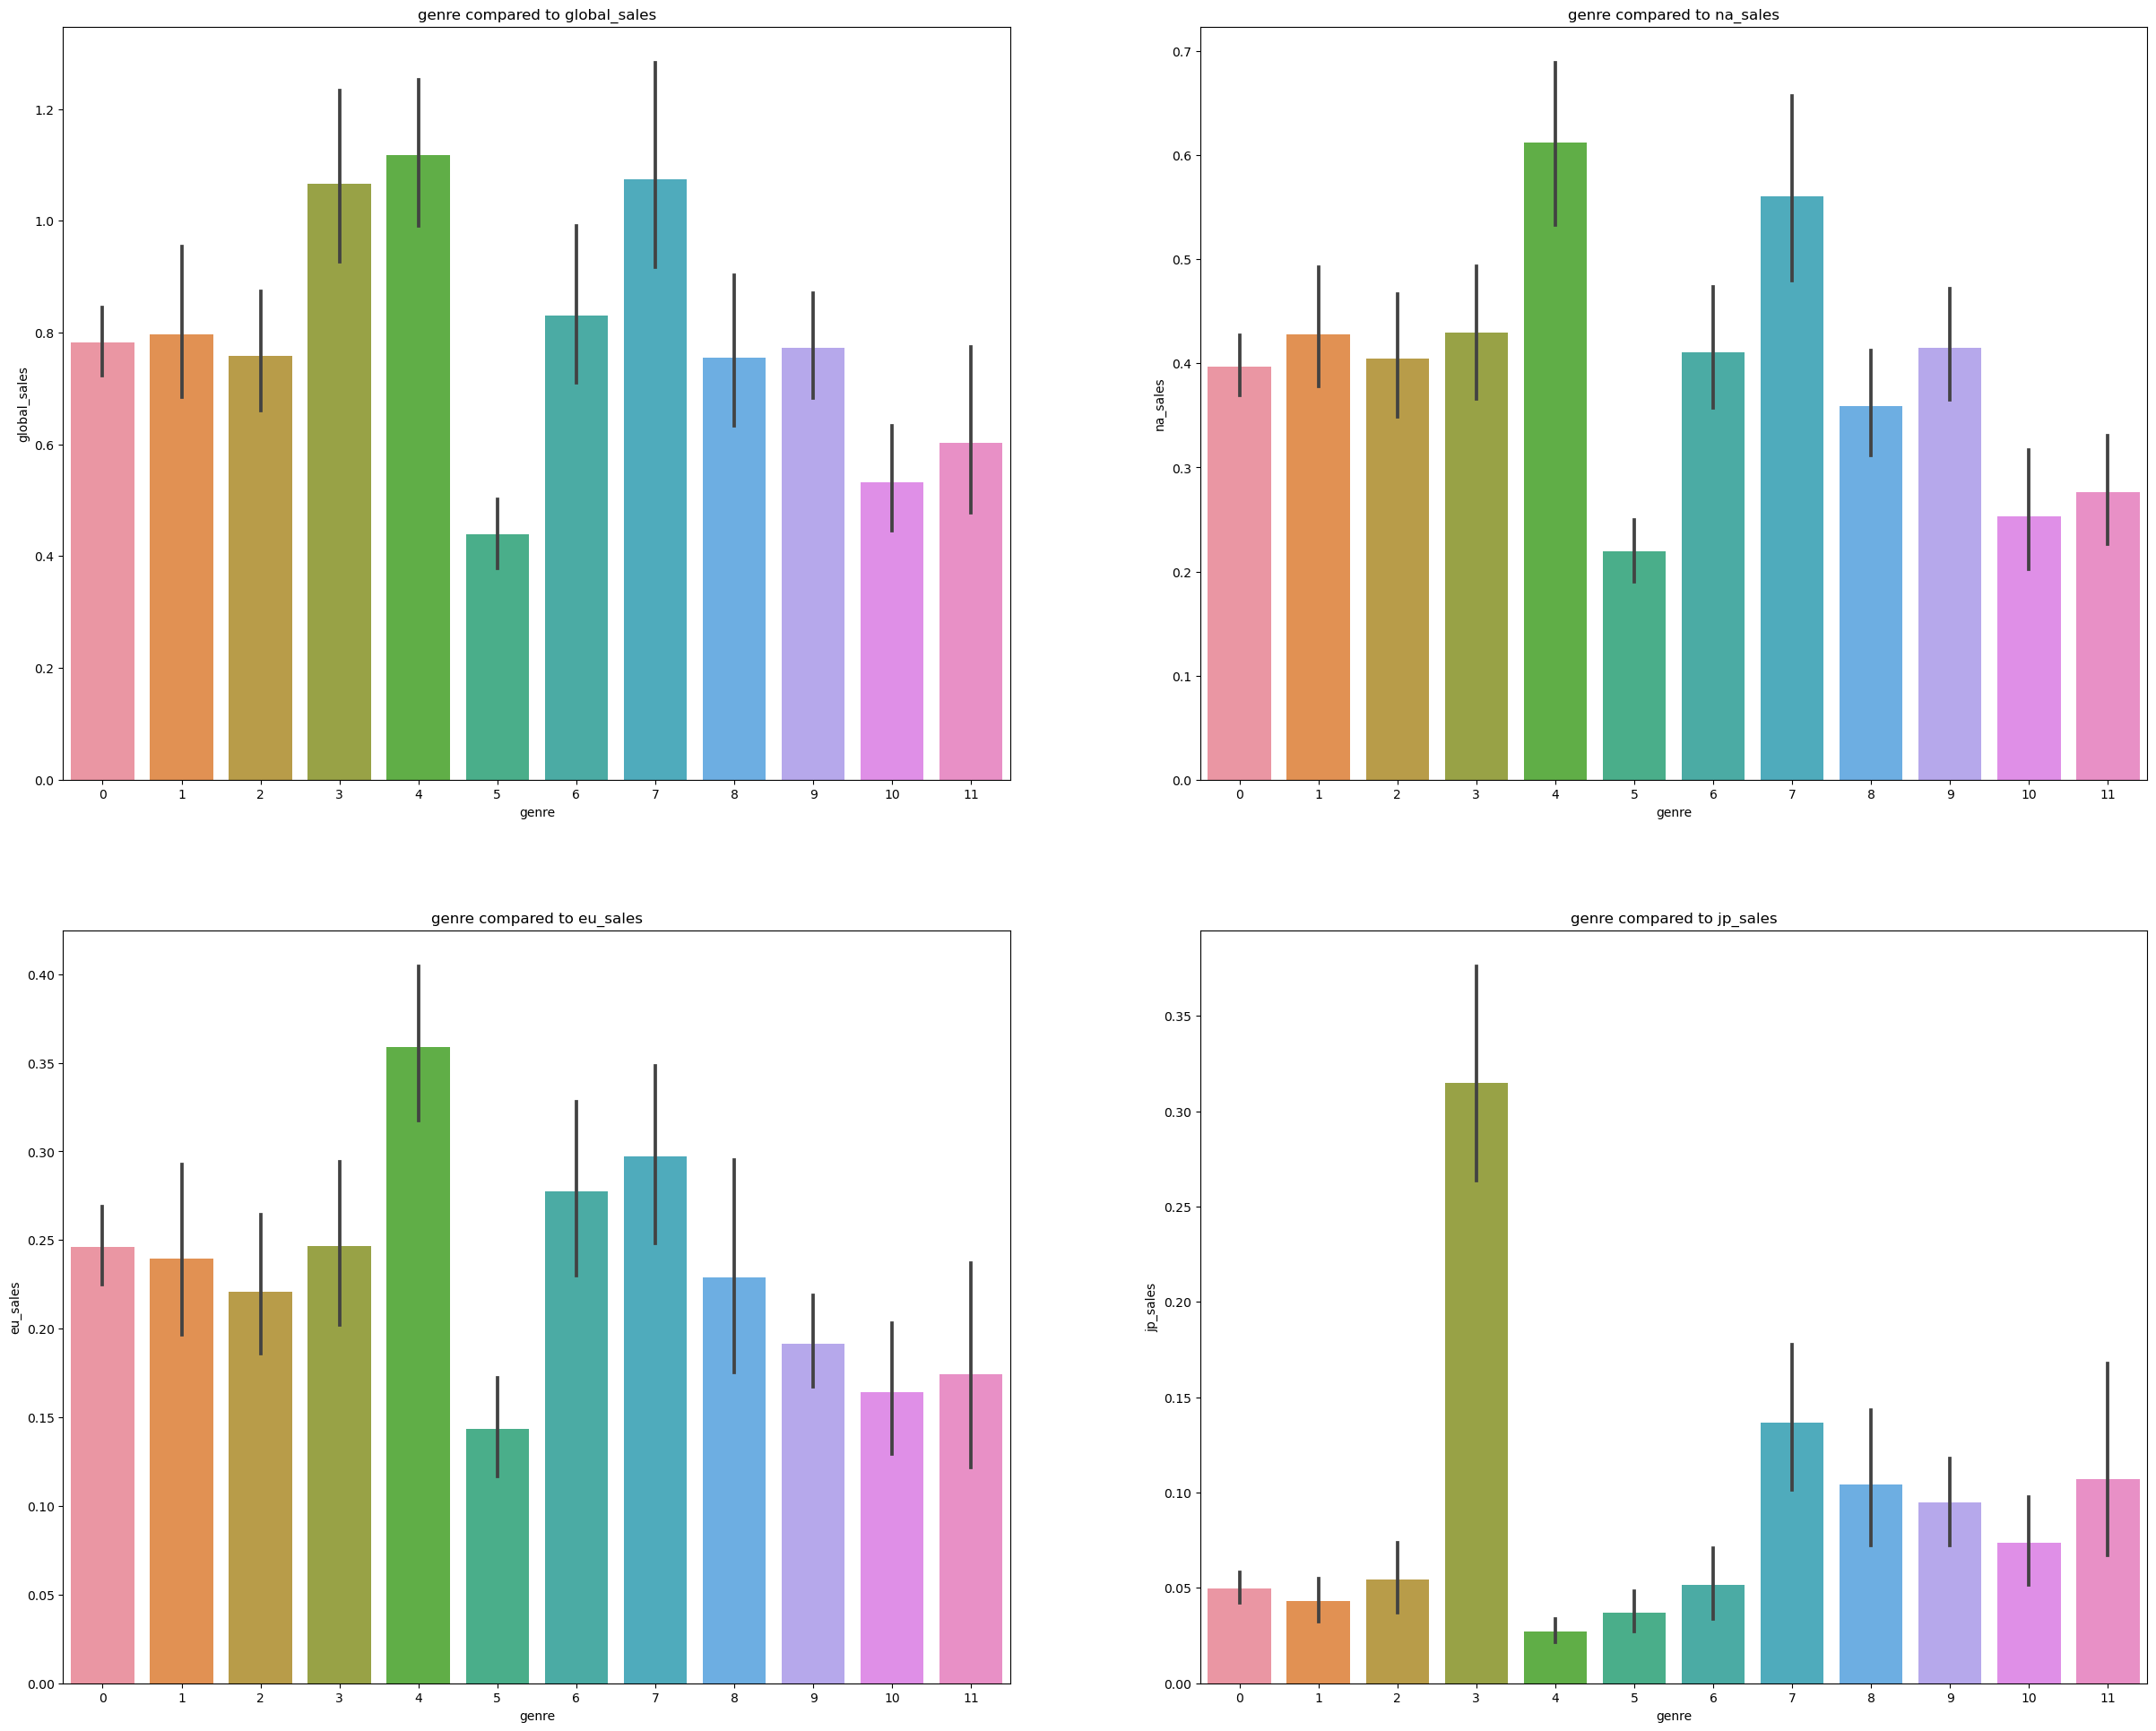

In [17]:
# let's take a look at our other categories compared to our target genre
plt.figure(figsize=(30,24))
x='genre'

plt.subplot(2,2,2)
y='na_sales'
sns.barplot(x=x, y=y, data=df)
plt.title(f'{x} compared to {y}')


plt.subplot(2,2,3)
y='eu_sales'
sns.barplot(x=x, y=y, data=df)
plt.title(f'{x} compared to {y}')


plt.subplot(2,2,4)
y='jp_sales'
sns.barplot(x=x, y=y, data=df)
plt.title(f'{x} compared to {y}')


plt.subplot(2,2,1)
y='global_sales'
sns.barplot(x=x, y=y, data=df)
plt.title(f'{x} compared to {y}')


plt.show()

### Immediate takeaways:
- Japan seems to largely prefer RPG as a genre based off sales
- Shooter and platform genre appear to do better in North America and Europe

In [18]:
# splitting the data for exploratory analysis
train_validate, test = train_test_split(df, test_size=0.2, random_state=117, stratify=df['genre'])
train, validate = train_test_split(train_validate, test_size=0.3, random_state=117, stratify=train_validate['genre'])

In [19]:
# establishing global baseline
train['baseline'] = train['genre'].value_counts().idxmax()

baseline_accuracy = (train.baseline == train.genre).mean()

### Running some t tests to validate takeaways

In [20]:
# Creating genre subsets
Action = train[train['genre'] == 0]
Sports = train[train['genre'] == 1]
Misc = train[train['genre'] == 2]
RPG = train[train['genre'] == 3]
Shooter = train[train['genre'] == 4]
Adventure = train[train['genre'] == 5]
Racing = train[train['genre'] == 6]
Platform = train[train['genre'] == 7]
Simulation = train[train['genre'] == 8]
Fighting = train[train['genre'] == 9]
Strategy = train[train['genre'] == 10]
Puzzle = train[train['genre'] == 11]

# Storing average for each country's sales for comparison
na_avg = train.na_sales.mean()
eu_avg = train.eu_sales.mean()
jp_avg = train.jp_sales.mean()
g_avg = train.global_sales.mean()

# creating better than average and worse than average subsets for each country
bta_na = train[train.na_sales >= na_avg]
wta_na = train[train.na_sales < na_avg]

bta_eu = train[train.eu_sales >= eu_avg]
wta_eu = train[train.eu_sales < eu_avg]

bta_jp = train[train.jp_sales >= jp_avg]
wta_jp = train[train.jp_sales < jp_avg]

bta_g = train[train.global_sales >= g_avg]
wta_g = train[train.global_sales < g_avg]

In [21]:
# stats testing to confirm if RPG's do better than the average in Japan
alpha = 0.05
null_hypothesis = 'average sales of games in the "RPG" genre in Japan <= overall average of sales in Japan'
alternative_hypothesis = 'average sales of games in the "RPG" genre in Japan > overall average of sales in Japan'
t, p = stats.ttest_1samp(RPG.jp_sales, jp_avg)
if p/2 > alpha:
    print(f"We fail to reject the null hypothesis. This confirms {null_hypothesis}.")
elif t < 0:
    print(f"We fail to reject null hypothesis. This confirms {null_hypothesis}.")
else:
    print(f"We reject the null hypothesis. This confirms {alternative_hypothesis}.")

We reject the null hypothesis. This confirms average sales of games in the "RPG" genre in Japan > overall average of sales in Japan.


In [22]:
# stats testing to confirm if Shooter genre does better than the total average in North America
alpha = 0.05
null_hypothesis = 'average sales of games in the "Shooter" genre in North America <= overall average of sales in North America'
alternative_hypothesis = 'average sales of games in the "Shooter" genre in North America > overall average of sales in North America'
t, p = stats.ttest_1samp(Shooter.na_sales, na_avg)
if p/2 > alpha:
    print(f"We fail to reject the null hypothesis. This confirms {null_hypothesis}.")
elif t < 0:
    print(f"We fail to reject null hypothesis. This confirms {null_hypothesis}.")
else:
    print(f"We reject the null hypothesis. This confirms {alternative_hypothesis}.")

We reject the null hypothesis. This confirms average sales of games in the "Shooter" genre in North America > overall average of sales in North America.


In [23]:
# stats testing to confirm if Shooter genre does better than the total average in Europe
alpha = 0.05
null_hypothesis = 'average sales of games in the "Shooter" genre in Europe <= overall average of sales in Europe'
alternative_hypothesis = 'average sales of games in the "Shooter" genre in Europe > overall average of sales in Europe'
t, p = stats.ttest_1samp(Shooter.eu_sales, eu_avg)
if p/2 > alpha:
    print(f"We fail to reject the null hypothesis. This confirms {null_hypothesis}.")
elif t < 0:
    print(f"We fail to reject null hypothesis. This confirms {null_hypothesis}.")
else:
    print(f"We reject the null hypothesis. This confirms {alternative_hypothesis}.")

We reject the null hypothesis. This confirms average sales of games in the "Shooter" genre in Europe > overall average of sales in Europe.


## Modeling
### Comparing data sets by region sales(Global, North America, Europe and Japan)

### Global Hyperparameter Comp

In [24]:
# creating x and y train/validate splits for model optimization
X_train_g = train.drop(columns=['genre', 'baseline'])
y_train_g = train['genre']

X_validate_g = validate.drop(columns=['genre'])
y_validate_g = validate['genre']

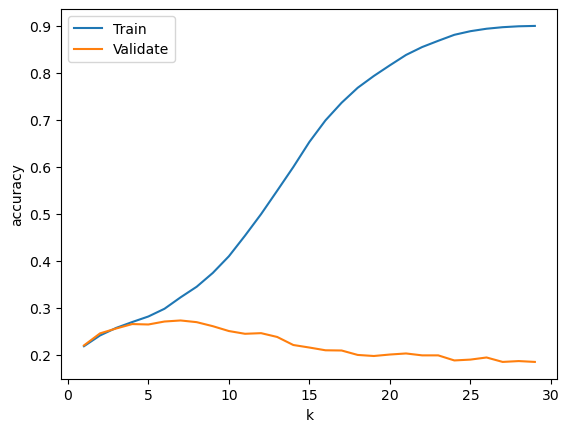

In [25]:
# comparing best hyperparameters for decision tree models
dt_comp(X_train_g, y_train_g, X_validate_g, y_validate_g)

In [ ]:
# comparing best hyperparameters for random forest models
rf_comp(X_train_g, y_train_g, X_validate_g, y_validate_g)

In [ ]:
# comparing best hyperparameters for knn models
knn_comp(X_train_g, y_train_g, X_validate_g, y_validate_g)

In [ ]:
# comparing optimal tuned models to determine best overall model to run test set on
model_comp(X_train_g, y_train_g, X_validate_g, y_validate_g, 6, 6, 16)

In [ ]:
# this was our optimal model from earlier tests so let's run it on unseen data

# first we'll create a split for the test data
X_test_g = test.drop(columns=['genre'])
y_test_g = test['genre']

# fitting train set to our optimal hyperparameters
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train_g, y_train_g)
train_score = rf.score(X_train_g, y_train_g)
validate_score = rf.score(X_validate_g, y_validate_g)
test_score = rf.score(X_test_g, y_test_g)

# finally let's compare the test and train set to observe potential overfitting
print(f'Train: {train_score:2%}\n\
Validate: {validate_score:2%}\n\
Test: {test_score:2%}')

### North America Hyperparameter Comp

In [ ]:
# creating x and y train/validate splits for model optimization
X_train_na = train.drop(columns=['genre', 'global_sales', 'eu_sales', 'jp_sales', 'baseline'])
y_train_na = train['genre']

X_validate_na = validate.drop(columns=['genre', 'global_sales', 'eu_sales', 'jp_sales'])
y_validate_na = validate['genre']

In [ ]:
# comparing best hyperparameters for random forest models
dt_comp(X_train_na, y_train_na, X_validate_na, y_validate_na)

In [ ]:
# comparing best hyperparameters for random forest models
rf_comp(X_train_na, y_train_na, X_validate_na, y_validate_na)

In [ ]:
# comparing best hyperparameters for knn models
knn_comp(X_train_na, y_train_na, X_validate_na, y_validate_na)

In [ ]:
# comparing optimal tuned models to determine best overall model to run test set on
model_comp(X_train_na, y_train_na, X_validate_na, y_validate_na, 5, 6, 18)

In [ ]:
# this was our optimal model from earlier tests so let's run it on unseen data

# first we'll create a split for the test data
X_test_na = test.drop(columns=['genre', 'global_sales', 'eu_sales', 'jp_sales'])
y_test_na = test['genre']

# fitting train set to our optimal hyperparameters
rf = RandomForestClassifier(max_depth = 6)
rf.fit(X_train_na, y_train_na)
train_score = rf.score(X_train_na, y_train_na)
validate_score = rf.score(X_validate_na, y_validate_na)
test_score = rf.score(X_test_na, y_test_na)

# finally let's compare the test and train set to observe potential overfitting
print(f'Train: {train_score:2%}\n\
Validate: {validate_score:2%}\n\
Test: {test_score:2%}')

### Europe Hyperparameter Comp

In [ ]:
# creating x and y train/validate splits for model optimization
X_train_eu = train.drop(columns=['genre', 'global_sales', 'na_sales', 'jp_sales', 'baseline'])
y_train_eu = train['genre']

X_validate_eu = validate.drop(columns=['genre', 'global_sales', 'na_sales', 'jp_sales'])
y_validate_eu = validate['genre']

In [ ]:
# comparing best hyperparameters for random forest models
dt_comp(X_train_eu, y_train_eu, X_validate_eu, y_validate_eu)

In [ ]:
# comparing best hyperparameters for random forest models
rf_comp(X_train_eu, y_train_eu, X_validate_eu, y_validate_eu)

In [ ]:
# comparing best hyperparameters for knn models
knn_comp(X_train_eu, y_train_eu, X_validate_eu, y_validate_eu)

In [ ]:
# comparing optimal tuned models to determine best overall model to run test set on
model_comp(X_train_eu, y_train_eu, X_validate_eu, y_validate_eu, 5, 5, 21)

In [ ]:
# this was our optimal model from earlier tests so let's run it on unseen data

# first we'll create a split for the test data
X_test_eu = test.drop(columns=['genre', 'global_sales', 'na_sales', 'jp_sales'])
y_test_eu = test['genre']

# fitting train set to our optimal hyperparameters
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train_eu, y_train_eu)
train_score = rf.score(X_train_eu, y_train_eu)
validate_score = rf.score(X_validate_eu, y_validate_eu)
test_score = rf.score(X_test_eu, y_test_eu)

# finally let's compare the test and train set to observe potential overfitting
print(f'Train: {train_score:2%}\n\
Validate: {validate_score:2%}\n\
Test: {test_score:2%}')

### Japan Hyperparameter Comp

In [ ]:
# creating x and y train/validate splits for model optimization
X_train_jp = train.drop(columns=['genre', 'global_sales', 'eu_sales', 'na_sales', 'baseline'])
y_train_jp = train['genre']

X_validate_jp = validate.drop(columns=['genre', 'global_sales', 'eu_sales', 'na_sales'])
y_validate_jp = validate['genre']

In [ ]:
# comparing best hyperparameters for random forest models
dt_comp(X_train_jp, y_train_jp, X_validate_jp, y_validate_jp)

In [ ]:
# comparing best hyperparameters for random forest models
rf_comp(X_train_jp, y_train_jp, X_validate_jp, y_validate_jp)

In [ ]:
# comparing best hyperparameters for knn models
knn_comp(X_train_jp, y_train_jp, X_validate_jp, y_validate_jp)

In [ ]:
# comparing optimal tuned models to determine best overall model to run test set on
model_comp(X_train_jp, y_train_jp, X_validate_jp, y_validate_jp, 4, 3, 19)

In [ ]:
# this was our optimal model from earlier tests so let's run it on unseen data

# first we'll create a split for the test data
X_test_jp = test.drop(columns=['genre', 'global_sales', 'eu_sales', 'na_sales'])
y_test_jp = test['genre']

# fitting train set to our optimal hyperparameters
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train_jp, y_train_jp)
train_score = dt.score(X_train_jp, y_train_jp)
validate_score = rf.score(X_validate_jp, y_validate_jp)
test_score = dt.score(X_test_jp, y_test_jp)

# finally let's compare the test and train set to observe potential overfitting
print(f'Train: {train_score:2%}\n\
Validate: {validate_score:2%}\n\
Test: {test_score:2%}')

In [ ]:
rf_comp(X_train_g, y_train_g, X_test_g, y_test_g)

## Conclusions

- All of our datasets outperformed baseline by about 4.3%
- Taking a look at our data globally, we were able to predict the overall chance of a genre type in successful sales much better than by indvidual region.
  - Our random forest model predicted the global dataset 29%, 7% better than the baseline of 22%.
- However, looking at individual regions reduced our predictive accuracy but led to valuable visual insights on the data. 
  - North America's Random Forest Model predicted genre at 24%
  - Europe's Random Forest Model predicted genre at 26%
  - Japan's Random Forest Model predicted genre at 26%

## Next Steps

- Add other unseen regions and see if preference continues to vary
- We still have a lot of categories in our target, so reducing how many categories we're trying to predict should bring our model accuracy up drastically
- There's is definitely an opportunity here for clustering so i'd love to incorporate that to create a more robust model